This notebook demonstrates how to calculate a quantum kernel using squlearn kernel module. It generates data, creates a Quantum Embedding Kernel (QEK) encoding circuit with two layers and one feature, and initializes its parameters with random values. It then creates a Qiskit Fidelity Kernel with based on a qasm simulator, assigns the parameters to the random parameters and finally uses QSVR for the fit and predict steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn.encoding_circuits import QEKEncodingCircuit
from squlearn.kernel.matrix import FidelityKernel
from squlearn.kernel.ml import QSVR, QKRR
from squlearn.util import Executor

In [2]:
# generate some training and test data
x = np.linspace(-0.8, 0.8, 20)
x_fine = np.linspace(-0.9, 0.9, 200)
y = np.sin(10.0 * x) * np.cos(np.exp(2 * x))

In [3]:
# define the encoding circuit
num_qubits = 10
enc_circuit = QEKEncodingCircuit(num_qubits, num_features=1, num_layers=2)

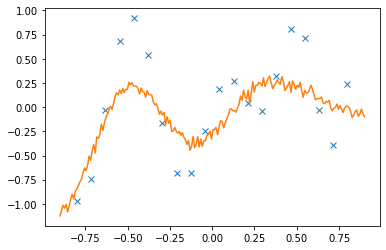

In [4]:
# Define the executor and set the desired number of shots
executor = Executor("qasm_simulator")
executor.set_shots(1000)

kernel = FidelityKernel(enc_circuit, executor=executor, parameter_seed=0)

# define QSVR instance
qsvr = QSVR(quantum_kernel=kernel)
qsvr.fit(x.reshape(-1, 1), y)
y_fine = qsvr.predict(x_fine.reshape(-1, 1))

# plot the results
plt.plot(x, y, "x")
plt.plot(x_fine, y_fine)